In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
 ar= pd.read_csv('arrival_delay', delimiter='\t')
 de=pd.read_csv('departure_delays', delimiter='\t')
airports=pd.read_csv('airports.csv')

In [3]:
# Define column headers
ar_column_names = ['UniqueCarrier', 'Origin', 'Destination','Year','Month','DayOfWeek','Arrival_delay']
de_column_names = ['UniqueCarrier', 'Origin', 'Destination','Year','Month','DayOfWeek','Departure_delay']

In [4]:
# Assign column names to the DataFrame
ar.columns = ar_column_names
de.columns = de_column_names

In [5]:
#Print head of the two datasets
ar.head()

,UniqueCarrier,Origin,Destination,Year,Month,DayOfWeek,Arrival_delay
0,ABE,ALB,AA,1991,5,6,12
1,ABE,ATL,DL,1991,10,1,-12
2,ABE,ATL,DL,1991,10,2,-13
3,ABE,ATL,DL,1991,10,3,-10
4,ABE,ATL,DL,1991,10,4,-13


In [6]:
de.head()

,UniqueCarrier,Origin,Destination,Year,Month,DayOfWeek,Departure_delay
0,ABE,ALB,AA,1991,5,6,-2
1,ABE,ATL,DL,1991,10,1,-1
2,ABE,ATL,DL,1991,10,2,2
3,ABE,ATL,DL,1991,10,3,1
4,ABE,ATL,DL,1991,10,4,2


In [7]:
#Check shape of files generated by MapReduce
ar.shape

(7104069, 7)

In [8]:
de.shape

(7107053, 7)

In [9]:
#Desciptive statistics for arrival delay.Note that this arrival delay is given in minutes
ar.loc[:,['Arrival_delay']].describe()

,Arrival_delay
count,7.104069e+06
mean,6.622039e+00
std,3.066270e+01
min,-1.410000e+03
25%,-7.000000e+00
50%,0.000000e+00
75%,1.100000e+01
max,2.461000e+03


In [10]:
#Desciptive statistics for arrival delay.Note that this departure delay is given in minutes
de.loc[:,['Departure_delay']].describe()

,Departure_delay
count,7.107053e+06
mean,7.870437e+00
std,2.926726e+01
min,-1.191000e+03
25%,-2.000000e+00
50%,0.000000e+00
75%,6.000000e+00
max,2.467000e+03


In [11]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [12]:
import pandas as pd

# Assuming you have a DataFrame named 'de' and another DataFrame named 'airports'

# Left join 'de' with 'airports' for 'Origin' and rename columns
de = pd.merge(de, airports[['iata', 'lat', 'long']], left_on='Origin', right_on='iata', how='left')
de.rename(columns={'lat': 'Origin_lat', 'long': 'Origin_long'}, inplace=True)


In [13]:
de.head()

,UniqueCarrier,Origin,Destination,Year,Month,DayOfWeek,Departure_delay,iata,Origin_lat,Origin_long
0,ABE,ALB,AA,1991,5,6,-2,ALB,42.748119,-73.802979
1,ABE,ATL,DL,1991,10,1,-1,ATL,33.640444,-84.426944
2,ABE,ATL,DL,1991,10,2,2,ATL,33.640444,-84.426944
3,ABE,ATL,DL,1991,10,3,1,ATL,33.640444,-84.426944
4,ABE,ATL,DL,1991,10,4,2,ATL,33.640444,-84.426944


In [14]:
de.columns

Index(['UniqueCarrier', 'Origin', 'Destination', 'Year', 'Month', 'DayOfWeek',
       'Departure_delay', 'iata', 'Origin_lat', 'Origin_long'],
      dtype='object')

Data visualisation for  departure delay

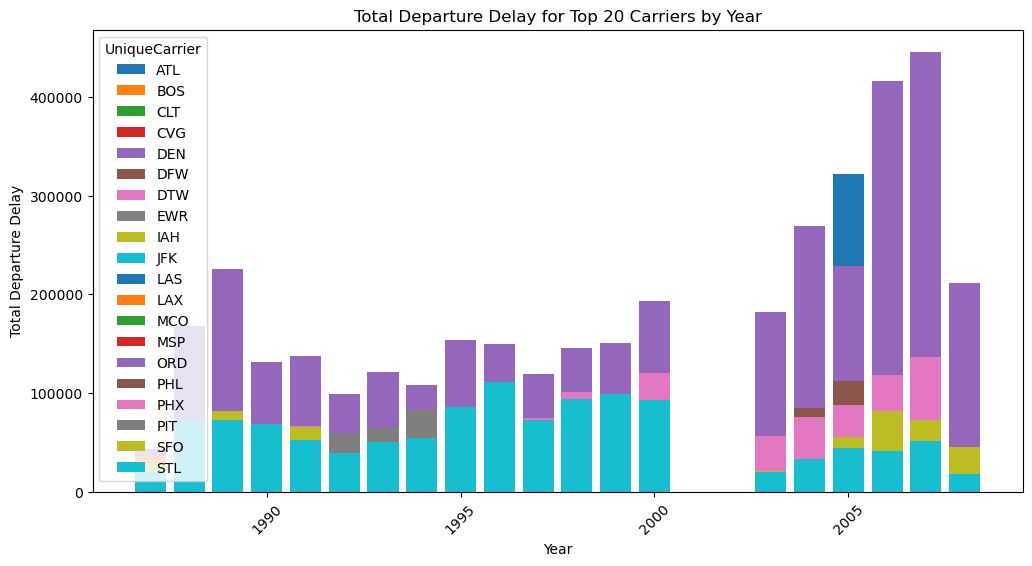

In [15]:
# Total departure delays in minutes per carrier in entire period

import matplotlib.pyplot as plt
import pandas as pd

# Determine the top 20 carriers based on total departure delay
top_n = 20  
top_carriers = de.groupby('UniqueCarrier')['Departure_delay'].sum().nlargest(top_n).index

# Filter the DataFrame for the top carriers
filtered_data = de[de['UniqueCarrier'].isin(top_carriers)]

# Group the filtered data by 'Year' and 'UniqueCarrier' and calculate the sum of 'Departure_delay'
grouped_data = filtered_data.groupby(['Year', 'UniqueCarrier'])['Departure_delay'].sum().unstack().reset_index()

# Create a stacked bar graph
plt.figure(figsize=(12, 6))

for carrier in grouped_data.columns[1:]:
    plt.bar(grouped_data['Year'], grouped_data[carrier], label=carrier)

plt.xlabel('Year')
plt.ylabel('Total Departure Delay')
plt.title(f'Total Departure Delay for Top {top_n} Carriers by Year')
plt.legend(title='UniqueCarrier', loc='upper left')
plt.xticks(rotation=45)
plt.show()





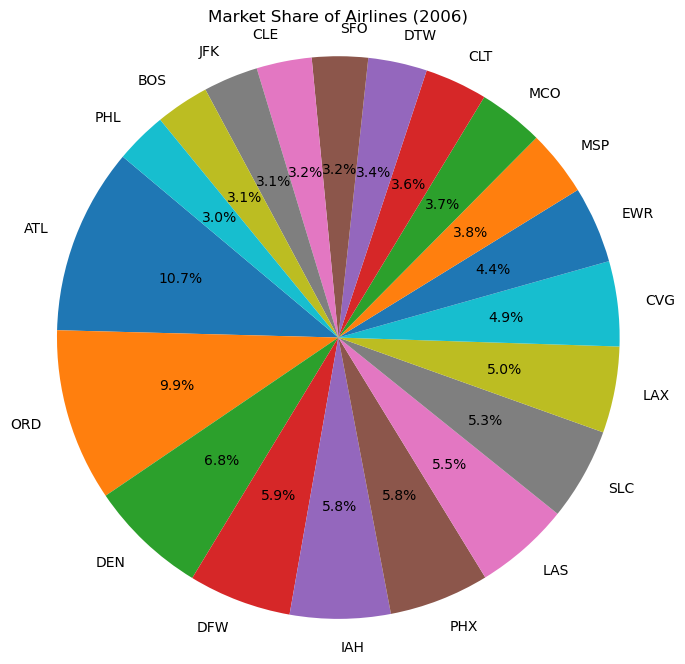

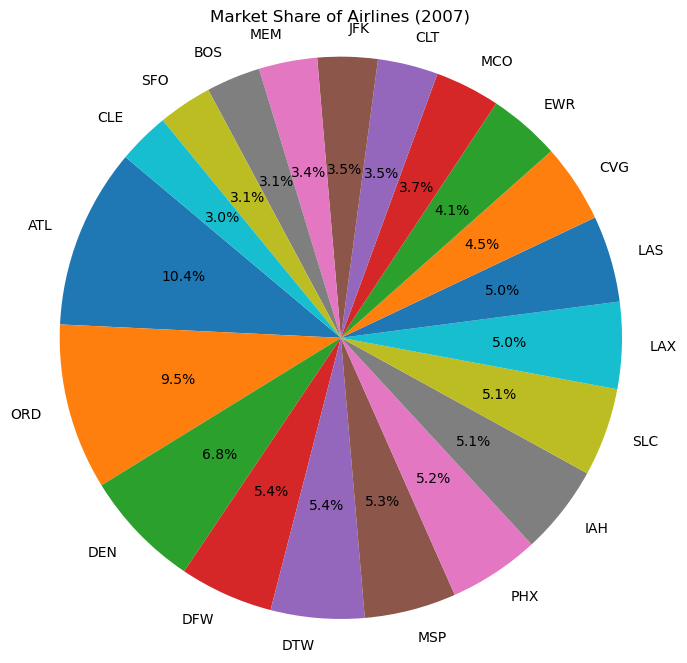

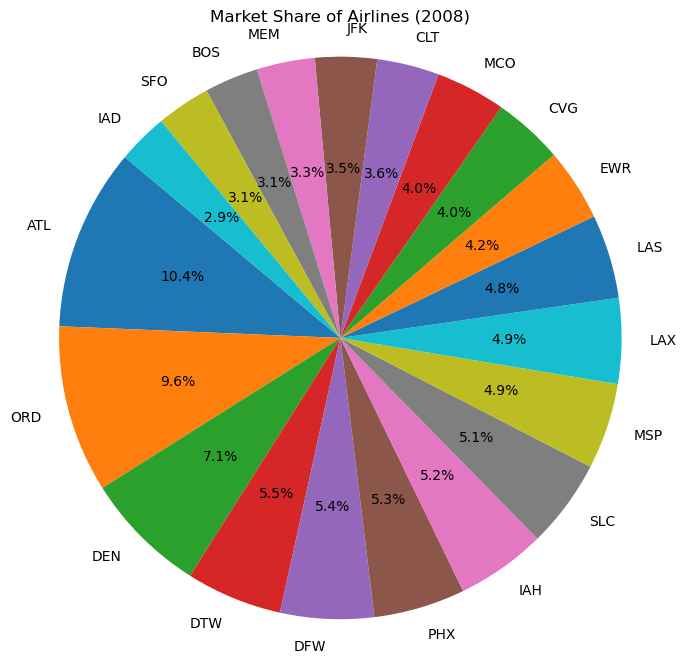

In [16]:
# Marketshare over the three period from 2005 to 2008

# Create three separate DataFrames for the years 2006, 2007, and 2008
de_2006 = de[de['Year'] == 2006]
de_2007 = de[de['Year'] == 2007]
de_2008 = de[de['Year'] == 2008]

# Determine the top 20 carriers for each year based on market share
top_20_2006 = de_2006['UniqueCarrier'].value_counts().nlargest(20).index
top_20_2007 = de_2007['UniqueCarrier'].value_counts().nlargest(20).index
top_20_2008 = de_2008['UniqueCarrier'].value_counts().nlargest(20).index

# Create pie charts for each year's top 20 carriers
def create_pie_chart(year, top_20_carriers):
    year_data = de[de['Year'] == year]
    year_data = year_data[year_data['UniqueCarrier'].isin(top_20_carriers)]
    market_share = year_data['UniqueCarrier'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Market Share of Airlines ({year})')
    plt.axis('equal')
    plt.show()

create_pie_chart(2006, top_20_2006)
create_pie_chart(2007, top_20_2007)
create_pie_chart(2008, top_20_2008)



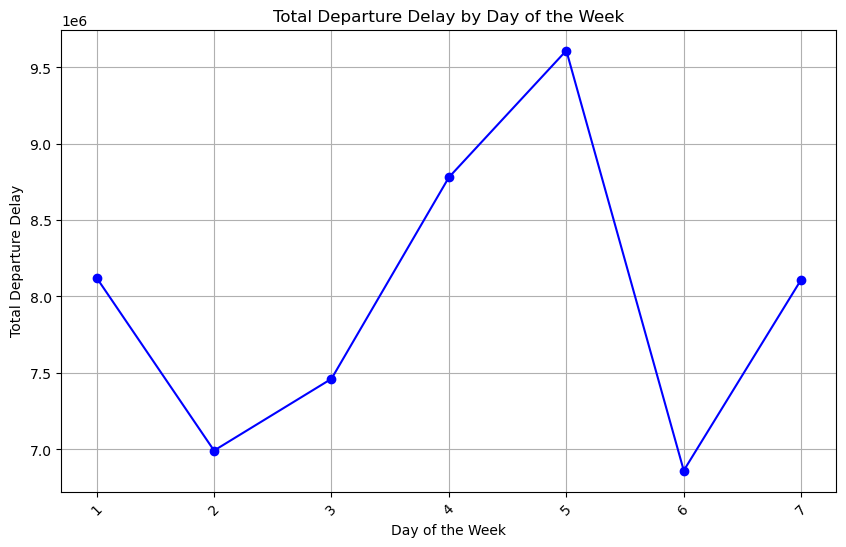

In [23]:
# Group the data by day of the week and calculate the sum of arrival delays
day_of_week_delay = de.groupby('DayOfWeek')['Departure_delay'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(np.array(day_of_week_delay.index), np.array(day_of_week_delay), marker='o', linestyle='-', color='b')
plt.xlabel('Day of the Week')
plt.ylabel('Total Departure Delay')
plt.title('Total Departure Delay by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Data visualisation for Arrival delay

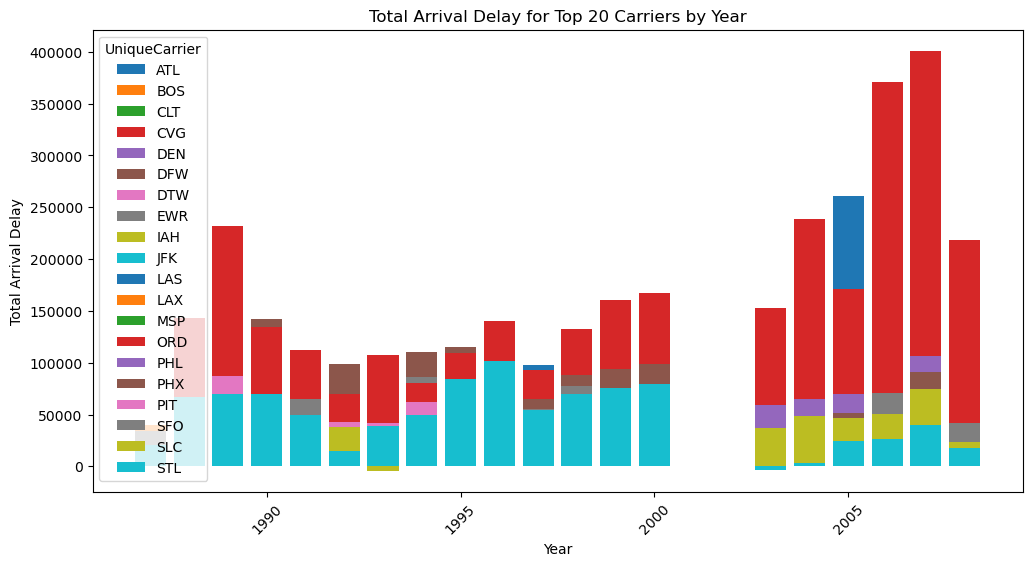

In [18]:
# Total arrival delays in minutes per carrier in entire period

# Determine the top 20 carriers based on total departure delay
top_n = 20  
top_carriers = ar.groupby('UniqueCarrier')['Arrival_delay'].sum().nlargest(top_n).index

# Filter the DataFrame for the top carriers
filtered_data = ar[ar['UniqueCarrier'].isin(top_carriers)]

# Group the filtered data by 'Year' and 'UniqueCarrier' and calculate the sum of 'Departure_delay'
grouped_data = filtered_data.groupby(['Year', 'UniqueCarrier'])['Arrival_delay'].sum().unstack().reset_index()

# Create a stacked bar graph
plt.figure(figsize=(12, 6))

for carrier in grouped_data.columns[1:]:
    plt.bar(grouped_data['Year'], grouped_data[carrier], label=carrier)

plt.xlabel('Year')
plt.ylabel('Total Arrival Delay')
plt.title(f'Total Arrival Delay for Top {top_n} Carriers by Year')
plt.legend(title='UniqueCarrier', loc='upper left')
plt.xticks(rotation=45)
plt.show()





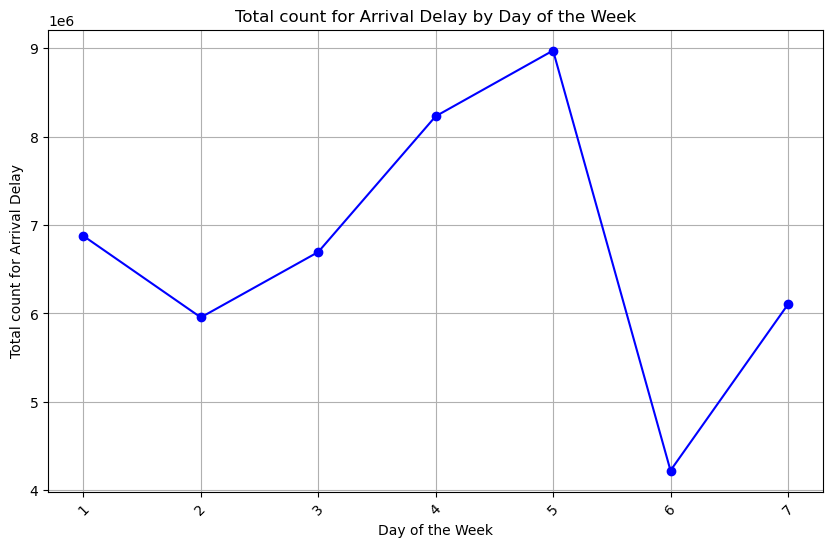

In [19]:
# Group the data by day of the week and calculate the sum of arrival delays
day_of_week_delay = ar.groupby('DayOfWeek')['Arrival_delay'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(np.array(day_of_week_delay.index), np.array(day_of_week_delay), marker='o', linestyle='-', color='b')
plt.xlabel('Day of the Week')
plt.ylabel('Total count for Arrival Delay')
plt.title('Total count for Arrival Delay by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

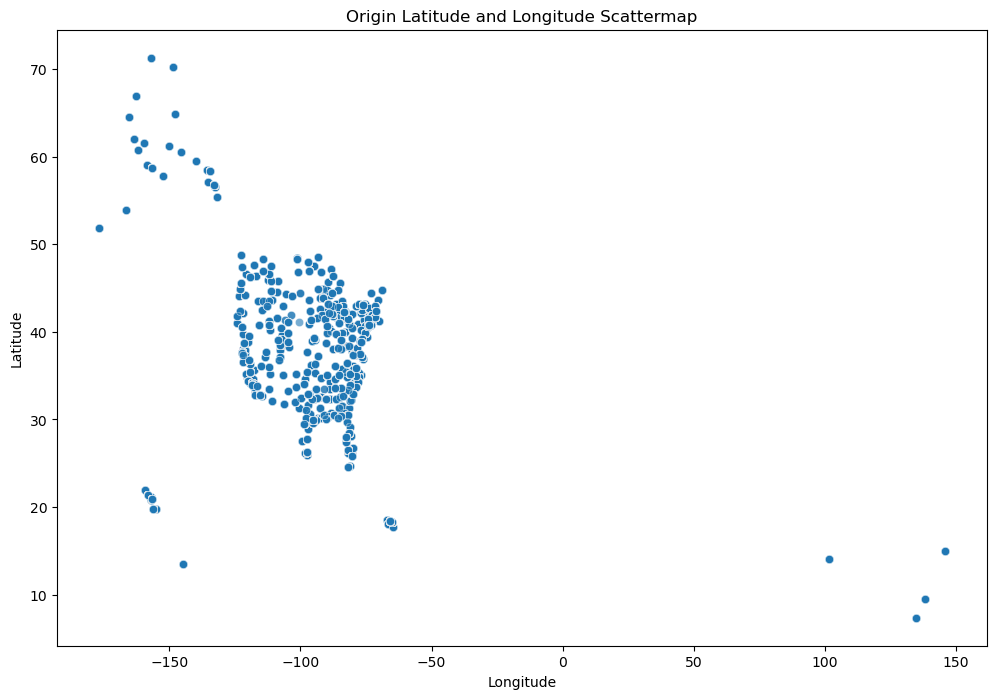

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(data=de, x='Origin_long', y='Origin_lat', alpha=0.6)
plt.title('Origin Latitude and Longitude Scattermap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


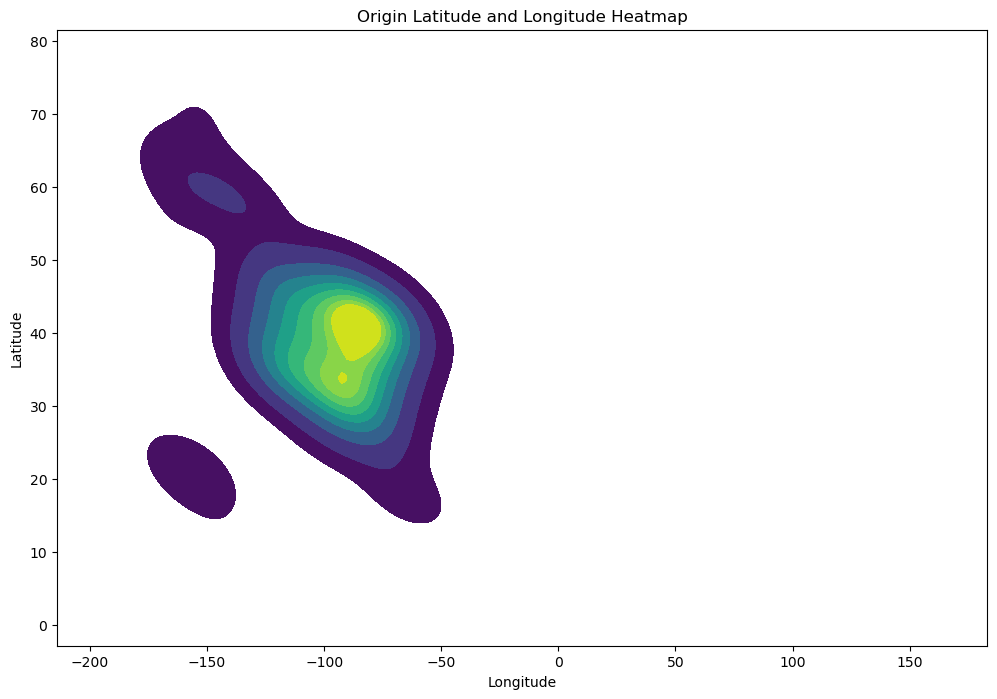

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'de' containing 'Origin_lat' and 'Origin_long'

# Remove duplicate coordinates and keep only distinct values
unique_coordinates = de[['Origin_lat', 'Origin_long']].drop_duplicates()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=unique_coordinates, x='Origin_long', y='Origin_lat', cmap='viridis', fill=True)
plt.title('Origin Latitude and Longitude Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

